# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [15]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

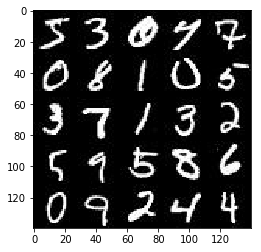

In [16]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

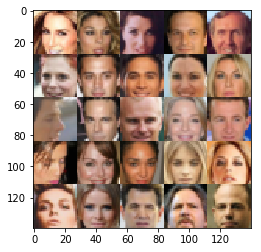

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/phillipcchin/anaconda3/envs/p3tf11/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [19]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [20]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits        

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [42]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x256 now

        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now

        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same')
        # 32x32x3 now

        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

###out_channel_dim <class 'int'> 5
###out_channel_dim <class 'int'> 5
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [43]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

###out_channel_dim <class 'int'> 4
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [44]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [45]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [58]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):    
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    tf.reset_default_graph()
    n, h, w, d = data_shape
    input_real, input_z, learning_rate_ph = model_inputs(h, w, d, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, d)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate_ph, beta1)
    
    saver = tf.train.Saver()
    samples, losses = [], []
    steps = 0    
    print_every = 10
    show_every = 100
    n_images = 72
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, 
                                                input_z: batch_z,
                                                learning_rate_ph: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, 
                                                input_real: batch_images,
                                                learning_rate_ph: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, d, data_image_mode)

        saver.save(sess, './checkpoints/generator.ckpt')                     

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

###out_channel_dim <class 'int'> 1
Epoch 1/2... Discriminator Loss: 0.0047... Generator Loss: 7.2559
Epoch 1/2... Discriminator Loss: 1.8114... Generator Loss: 0.1818
Epoch 1/2... Discriminator Loss: 0.5749... Generator Loss: 10.3508
Epoch 1/2... Discriminator Loss: 0.8765... Generator Loss: 0.5680
Epoch 1/2... Discriminator Loss: 1.5970... Generator Loss: 11.5598
Epoch 1/2... Discriminator Loss: 0.7114... Generator Loss: 1.0785
Epoch 1/2... Discriminator Loss: 2.6488... Generator Loss: 0.1710
Epoch 1/2... Discriminator Loss: 0.1515... Generator Loss: 2.0385
Epoch 1/2... Discriminator Loss: 0.2816... Generator Loss: 5.5214
Epoch 1/2... Discriminator Loss: 1.4933... Generator Loss: 5.3723
###out_channel_dim <class 'int'> 1


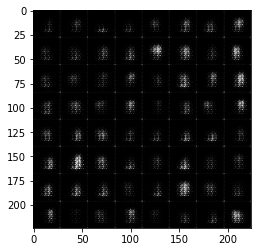

Epoch 1/2... Discriminator Loss: 0.0897... Generator Loss: 5.4103
Epoch 1/2... Discriminator Loss: 1.7582... Generator Loss: 0.3808
Epoch 1/2... Discriminator Loss: 0.5391... Generator Loss: 1.0457
Epoch 1/2... Discriminator Loss: 0.4404... Generator Loss: 7.8160
Epoch 1/2... Discriminator Loss: 1.0035... Generator Loss: 0.7613
Epoch 1/2... Discriminator Loss: 1.7927... Generator Loss: 0.2626
Epoch 1/2... Discriminator Loss: 1.9547... Generator Loss: 0.8661
Epoch 1/2... Discriminator Loss: 0.9066... Generator Loss: 4.9260
Epoch 1/2... Discriminator Loss: 0.3794... Generator Loss: 1.4890
Epoch 1/2... Discriminator Loss: 0.2343... Generator Loss: 2.8876
###out_channel_dim <class 'int'> 1


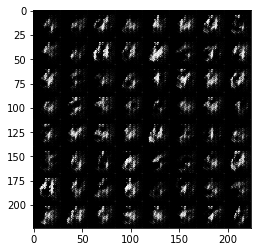

Epoch 1/2... Discriminator Loss: 0.0851... Generator Loss: 5.7001
Epoch 1/2... Discriminator Loss: 0.1480... Generator Loss: 4.4845
Epoch 1/2... Discriminator Loss: 0.2060... Generator Loss: 4.4593
Epoch 1/2... Discriminator Loss: 0.1703... Generator Loss: 2.3159
Epoch 1/2... Discriminator Loss: 0.0186... Generator Loss: 4.8390
Epoch 1/2... Discriminator Loss: 0.0390... Generator Loss: 3.7735
Epoch 1/2... Discriminator Loss: 0.0390... Generator Loss: 3.5428
Epoch 1/2... Discriminator Loss: 0.0505... Generator Loss: 3.4415
Epoch 1/2... Discriminator Loss: 0.0640... Generator Loss: 3.1859
Epoch 1/2... Discriminator Loss: 0.0730... Generator Loss: 3.1190
###out_channel_dim <class 'int'> 1


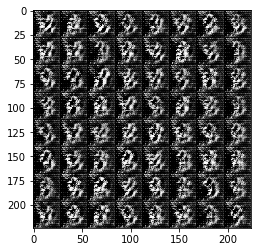

Epoch 1/2... Discriminator Loss: 0.9392... Generator Loss: 0.7464
Epoch 1/2... Discriminator Loss: 0.0679... Generator Loss: 6.5028
Epoch 1/2... Discriminator Loss: 2.4739... Generator Loss: 0.2629
Epoch 1/2... Discriminator Loss: 0.2190... Generator Loss: 1.9780
Epoch 1/2... Discriminator Loss: 0.3342... Generator Loss: 1.7002
Epoch 1/2... Discriminator Loss: 0.2758... Generator Loss: 6.6267
Epoch 1/2... Discriminator Loss: 0.1563... Generator Loss: 2.8072
Epoch 1/2... Discriminator Loss: 0.0366... Generator Loss: 4.3380
Epoch 1/2... Discriminator Loss: 0.0806... Generator Loss: 4.1690
Epoch 1/2... Discriminator Loss: 0.2310... Generator Loss: 4.4687
###out_channel_dim <class 'int'> 1


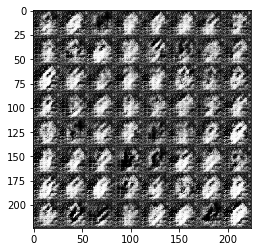

Epoch 1/2... Discriminator Loss: 0.1542... Generator Loss: 2.9587
Epoch 1/2... Discriminator Loss: 0.1733... Generator Loss: 3.9990
Epoch 1/2... Discriminator Loss: 0.0384... Generator Loss: 6.5317
Epoch 1/2... Discriminator Loss: 2.5203... Generator Loss: 0.2173
Epoch 1/2... Discriminator Loss: 0.0826... Generator Loss: 4.8522
Epoch 1/2... Discriminator Loss: 0.1373... Generator Loss: 5.0232
Epoch 1/2... Discriminator Loss: 1.3403... Generator Loss: 0.5570
Epoch 1/2... Discriminator Loss: 1.8097... Generator Loss: 0.3135
Epoch 1/2... Discriminator Loss: 0.7002... Generator Loss: 0.9142
Epoch 1/2... Discriminator Loss: 0.1696... Generator Loss: 3.9240
###out_channel_dim <class 'int'> 1


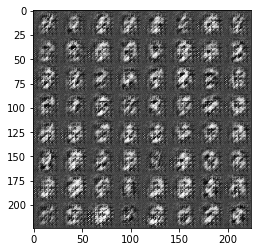

Epoch 1/2... Discriminator Loss: 0.6540... Generator Loss: 3.7598
Epoch 1/2... Discriminator Loss: 0.2910... Generator Loss: 1.9495
Epoch 1/2... Discriminator Loss: 1.0300... Generator Loss: 6.1640
Epoch 1/2... Discriminator Loss: 0.3796... Generator Loss: 3.0207
Epoch 1/2... Discriminator Loss: 0.0640... Generator Loss: 3.7648
Epoch 1/2... Discriminator Loss: 0.9561... Generator Loss: 5.4148
Epoch 1/2... Discriminator Loss: 0.1509... Generator Loss: 2.7289
Epoch 1/2... Discriminator Loss: 1.2826... Generator Loss: 0.4322
Epoch 1/2... Discriminator Loss: 0.4626... Generator Loss: 1.4214
Epoch 1/2... Discriminator Loss: 0.4847... Generator Loss: 3.8473
###out_channel_dim <class 'int'> 1


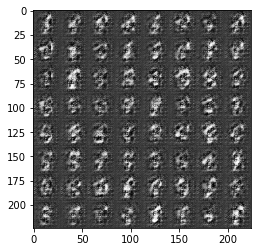

Epoch 1/2... Discriminator Loss: 0.2639... Generator Loss: 2.2078
Epoch 1/2... Discriminator Loss: 0.1728... Generator Loss: 2.3004
Epoch 1/2... Discriminator Loss: 0.0671... Generator Loss: 4.0784
Epoch 1/2... Discriminator Loss: 0.1421... Generator Loss: 2.7263
Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.4848
Epoch 1/2... Discriminator Loss: 0.2504... Generator Loss: 1.8709
Epoch 1/2... Discriminator Loss: 0.6154... Generator Loss: 1.9375
Epoch 1/2... Discriminator Loss: 0.1023... Generator Loss: 3.3968
Epoch 1/2... Discriminator Loss: 0.4641... Generator Loss: 1.3762
Epoch 1/2... Discriminator Loss: 1.0854... Generator Loss: 0.5523
###out_channel_dim <class 'int'> 1


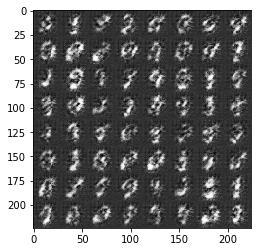

Epoch 1/2... Discriminator Loss: 0.1953... Generator Loss: 4.4526
Epoch 1/2... Discriminator Loss: 0.4063... Generator Loss: 1.4104
Epoch 1/2... Discriminator Loss: 0.1593... Generator Loss: 2.4005
Epoch 1/2... Discriminator Loss: 0.0153... Generator Loss: 4.7544
Epoch 1/2... Discriminator Loss: 0.0413... Generator Loss: 3.6703
Epoch 1/2... Discriminator Loss: 0.2590... Generator Loss: 1.8319
Epoch 1/2... Discriminator Loss: 0.5405... Generator Loss: 1.3302
Epoch 1/2... Discriminator Loss: 0.0533... Generator Loss: 3.2899
Epoch 1/2... Discriminator Loss: 0.8245... Generator Loss: 1.2512
Epoch 1/2... Discriminator Loss: 0.1898... Generator Loss: 2.3230
###out_channel_dim <class 'int'> 1


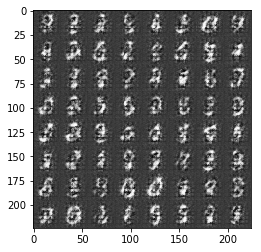

Epoch 1/2... Discriminator Loss: 0.0774... Generator Loss: 3.1646
Epoch 1/2... Discriminator Loss: 0.4539... Generator Loss: 1.3257
Epoch 1/2... Discriminator Loss: 1.3924... Generator Loss: 3.3366
Epoch 1/2... Discriminator Loss: 0.8458... Generator Loss: 2.2302
Epoch 1/2... Discriminator Loss: 0.9862... Generator Loss: 0.7376
Epoch 1/2... Discriminator Loss: 0.5790... Generator Loss: 1.2695
Epoch 1/2... Discriminator Loss: 1.9852... Generator Loss: 0.2261
Epoch 1/2... Discriminator Loss: 0.2853... Generator Loss: 1.7326
Epoch 1/2... Discriminator Loss: 0.4567... Generator Loss: 1.4112
Epoch 1/2... Discriminator Loss: 0.2170... Generator Loss: 2.0244
###out_channel_dim <class 'int'> 1


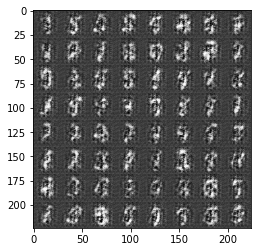

Epoch 1/2... Discriminator Loss: 0.5199... Generator Loss: 1.0620
Epoch 1/2... Discriminator Loss: 0.1908... Generator Loss: 2.1982
Epoch 1/2... Discriminator Loss: 0.1805... Generator Loss: 2.1938
Epoch 1/2... Discriminator Loss: 0.6241... Generator Loss: 0.9520
Epoch 1/2... Discriminator Loss: 3.6678... Generator Loss: 0.0648
Epoch 1/2... Discriminator Loss: 0.2424... Generator Loss: 2.9826
Epoch 1/2... Discriminator Loss: 0.4507... Generator Loss: 3.3238
Epoch 1/2... Discriminator Loss: 0.8202... Generator Loss: 0.6865
Epoch 1/2... Discriminator Loss: 1.1284... Generator Loss: 0.5476
Epoch 1/2... Discriminator Loss: 0.2461... Generator Loss: 1.8817
###out_channel_dim <class 'int'> 1


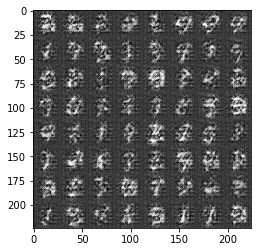

Epoch 1/2... Discriminator Loss: 0.2047... Generator Loss: 1.8767
Epoch 1/2... Discriminator Loss: 0.1697... Generator Loss: 2.4127
Epoch 1/2... Discriminator Loss: 0.2425... Generator Loss: 2.1180
Epoch 1/2... Discriminator Loss: 0.1454... Generator Loss: 2.3254
Epoch 1/2... Discriminator Loss: 0.3406... Generator Loss: 1.5342
Epoch 1/2... Discriminator Loss: 0.4767... Generator Loss: 1.2338
Epoch 1/2... Discriminator Loss: 0.4889... Generator Loss: 1.3724
Epoch 1/2... Discriminator Loss: 0.0668... Generator Loss: 3.4258
Epoch 1/2... Discriminator Loss: 0.0861... Generator Loss: 2.7937
Epoch 1/2... Discriminator Loss: 0.2222... Generator Loss: 2.0123
###out_channel_dim <class 'int'> 1


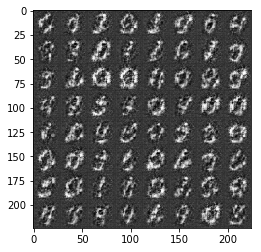

Epoch 1/2... Discriminator Loss: 0.2622... Generator Loss: 1.8469
Epoch 1/2... Discriminator Loss: 0.2357... Generator Loss: 1.9196
Epoch 1/2... Discriminator Loss: 0.0199... Generator Loss: 4.5317
Epoch 1/2... Discriminator Loss: 0.4380... Generator Loss: 1.4039
Epoch 1/2... Discriminator Loss: 0.0206... Generator Loss: 6.2540
Epoch 1/2... Discriminator Loss: 2.4998... Generator Loss: 0.2524
Epoch 1/2... Discriminator Loss: 0.2695... Generator Loss: 2.2568
Epoch 1/2... Discriminator Loss: 1.9876... Generator Loss: 5.8492
Epoch 1/2... Discriminator Loss: 0.6571... Generator Loss: 1.1279
Epoch 1/2... Discriminator Loss: 1.1138... Generator Loss: 3.7791
###out_channel_dim <class 'int'> 1


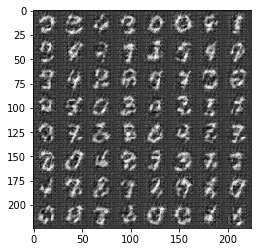

Epoch 1/2... Discriminator Loss: 0.2765... Generator Loss: 1.6978
Epoch 1/2... Discriminator Loss: 1.0501... Generator Loss: 0.6140
Epoch 1/2... Discriminator Loss: 0.5384... Generator Loss: 1.0911
Epoch 1/2... Discriminator Loss: 0.5436... Generator Loss: 1.0777
Epoch 1/2... Discriminator Loss: 0.0762... Generator Loss: 3.9756
Epoch 1/2... Discriminator Loss: 0.3114... Generator Loss: 1.5144
Epoch 1/2... Discriminator Loss: 0.1372... Generator Loss: 2.3365
Epoch 1/2... Discriminator Loss: 0.0247... Generator Loss: 4.3730
Epoch 1/2... Discriminator Loss: 0.2555... Generator Loss: 1.7471
Epoch 1/2... Discriminator Loss: 0.0485... Generator Loss: 3.8061
###out_channel_dim <class 'int'> 1


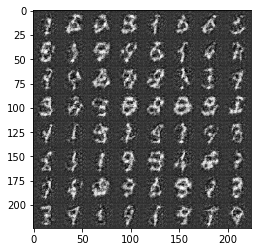

Epoch 1/2... Discriminator Loss: 0.6005... Generator Loss: 1.0476
Epoch 1/2... Discriminator Loss: 0.3140... Generator Loss: 1.6133
Epoch 1/2... Discriminator Loss: 0.0596... Generator Loss: 3.7977
Epoch 1/2... Discriminator Loss: 1.0835... Generator Loss: 0.6123
Epoch 1/2... Discriminator Loss: 0.0446... Generator Loss: 4.8483
Epoch 1/2... Discriminator Loss: 0.3376... Generator Loss: 1.6174
Epoch 1/2... Discriminator Loss: 0.1410... Generator Loss: 5.6939
Epoch 1/2... Discriminator Loss: 0.1103... Generator Loss: 3.2088
Epoch 1/2... Discriminator Loss: 0.9942... Generator Loss: 0.6661
Epoch 1/2... Discriminator Loss: 0.4017... Generator Loss: 1.1553
###out_channel_dim <class 'int'> 1


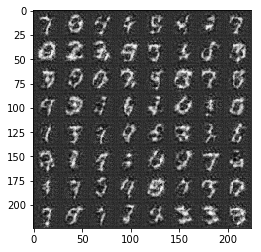

Epoch 1/2... Discriminator Loss: 0.2320... Generator Loss: 2.0190
Epoch 1/2... Discriminator Loss: 0.7964... Generator Loss: 0.8766
Epoch 1/2... Discriminator Loss: 0.5716... Generator Loss: 1.1129
Epoch 1/2... Discriminator Loss: 0.1962... Generator Loss: 2.0439
Epoch 1/2... Discriminator Loss: 1.0712... Generator Loss: 1.4177
Epoch 1/2... Discriminator Loss: 0.6425... Generator Loss: 2.9715
Epoch 1/2... Discriminator Loss: 0.5777... Generator Loss: 1.0646
Epoch 1/2... Discriminator Loss: 0.5229... Generator Loss: 4.3014
Epoch 1/2... Discriminator Loss: 0.1968... Generator Loss: 2.1126
Epoch 1/2... Discriminator Loss: 0.2721... Generator Loss: 1.7148
###out_channel_dim <class 'int'> 1


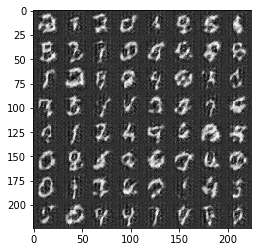

Epoch 1/2... Discriminator Loss: 0.1823... Generator Loss: 3.6578
Epoch 1/2... Discriminator Loss: 0.2070... Generator Loss: 2.3436
Epoch 1/2... Discriminator Loss: 3.1082... Generator Loss: 0.0700
Epoch 1/2... Discriminator Loss: 0.2077... Generator Loss: 3.6021
Epoch 1/2... Discriminator Loss: 0.2990... Generator Loss: 1.8939
Epoch 1/2... Discriminator Loss: 0.2727... Generator Loss: 3.7177
Epoch 1/2... Discriminator Loss: 1.8494... Generator Loss: 6.3127
Epoch 1/2... Discriminator Loss: 0.8006... Generator Loss: 0.9204
Epoch 1/2... Discriminator Loss: 0.7054... Generator Loss: 0.8479
Epoch 1/2... Discriminator Loss: 0.7585... Generator Loss: 2.8859
###out_channel_dim <class 'int'> 1


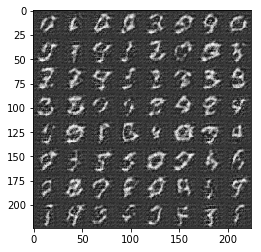

Epoch 1/2... Discriminator Loss: 0.2560... Generator Loss: 2.8093
Epoch 1/2... Discriminator Loss: 0.7166... Generator Loss: 0.9221
Epoch 1/2... Discriminator Loss: 2.2830... Generator Loss: 0.2004
Epoch 1/2... Discriminator Loss: 0.5474... Generator Loss: 1.2002
Epoch 1/2... Discriminator Loss: 0.5802... Generator Loss: 0.9593
Epoch 1/2... Discriminator Loss: 0.3039... Generator Loss: 1.4189
Epoch 1/2... Discriminator Loss: 0.6429... Generator Loss: 0.9479
Epoch 1/2... Discriminator Loss: 0.3528... Generator Loss: 1.5738
Epoch 1/2... Discriminator Loss: 0.0380... Generator Loss: 3.8788
Epoch 1/2... Discriminator Loss: 1.9506... Generator Loss: 0.1802
###out_channel_dim <class 'int'> 1


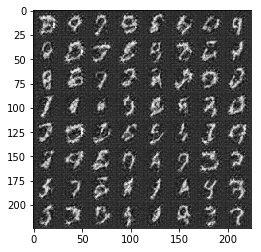

Epoch 1/2... Discriminator Loss: 0.1944... Generator Loss: 2.0928
Epoch 1/2... Discriminator Loss: 0.0681... Generator Loss: 3.1589
Epoch 1/2... Discriminator Loss: 0.4391... Generator Loss: 1.1820
Epoch 1/2... Discriminator Loss: 0.1523... Generator Loss: 2.1820
Epoch 1/2... Discriminator Loss: 0.0492... Generator Loss: 3.7738
Epoch 1/2... Discriminator Loss: 0.1053... Generator Loss: 2.6928
Epoch 1/2... Discriminator Loss: 0.0255... Generator Loss: 4.1545
Epoch 1/2... Discriminator Loss: 0.0225... Generator Loss: 4.6408
Epoch 1/2... Discriminator Loss: 0.1220... Generator Loss: 4.2558
Epoch 1/2... Discriminator Loss: 0.9355... Generator Loss: 0.7333
###out_channel_dim <class 'int'> 1


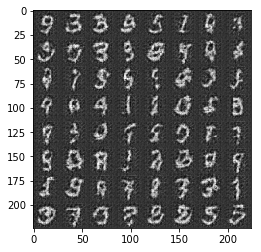

Epoch 1/2... Discriminator Loss: 0.3369... Generator Loss: 1.9971
Epoch 1/2... Discriminator Loss: 0.3487... Generator Loss: 2.9968
Epoch 1/2... Discriminator Loss: 0.2493... Generator Loss: 2.3152
Epoch 1/2... Discriminator Loss: 0.2590... Generator Loss: 1.8223
Epoch 1/2... Discriminator Loss: 0.4262... Generator Loss: 1.3798
Epoch 1/2... Discriminator Loss: 0.9057... Generator Loss: 0.7618
Epoch 1/2... Discriminator Loss: 0.1932... Generator Loss: 2.2295
Epoch 1/2... Discriminator Loss: 0.2742... Generator Loss: 1.9498
Epoch 1/2... Discriminator Loss: 0.1483... Generator Loss: 2.6245
Epoch 1/2... Discriminator Loss: 0.1277... Generator Loss: 2.4145
###out_channel_dim <class 'int'> 1


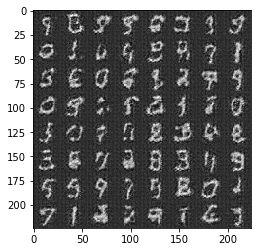

Epoch 1/2... Discriminator Loss: 0.6893... Generator Loss: 0.8816
Epoch 1/2... Discriminator Loss: 0.2600... Generator Loss: 1.8112
Epoch 1/2... Discriminator Loss: 0.1892... Generator Loss: 2.0981
Epoch 1/2... Discriminator Loss: 0.0804... Generator Loss: 2.9994
Epoch 1/2... Discriminator Loss: 0.0951... Generator Loss: 2.6719
Epoch 1/2... Discriminator Loss: 0.0582... Generator Loss: 3.2900
Epoch 1/2... Discriminator Loss: 0.0392... Generator Loss: 4.2996
Epoch 1/2... Discriminator Loss: 0.1089... Generator Loss: 2.7712
Epoch 1/2... Discriminator Loss: 2.3907... Generator Loss: 0.1514
Epoch 1/2... Discriminator Loss: 0.5657... Generator Loss: 1.0482
###out_channel_dim <class 'int'> 1


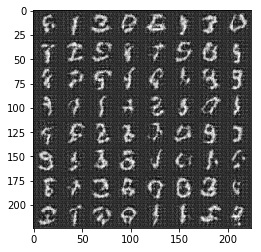

Epoch 1/2... Discriminator Loss: 0.2255... Generator Loss: 1.8501
Epoch 1/2... Discriminator Loss: 0.4900... Generator Loss: 1.1917
Epoch 1/2... Discriminator Loss: 0.0934... Generator Loss: 3.2709
Epoch 1/2... Discriminator Loss: 0.8605... Generator Loss: 0.7025
Epoch 1/2... Discriminator Loss: 2.1760... Generator Loss: 0.3738
Epoch 1/2... Discriminator Loss: 0.4320... Generator Loss: 1.2514
Epoch 1/2... Discriminator Loss: 0.2931... Generator Loss: 1.9833
Epoch 1/2... Discriminator Loss: 0.4486... Generator Loss: 1.2018
Epoch 1/2... Discriminator Loss: 0.2587... Generator Loss: 2.1470
Epoch 1/2... Discriminator Loss: 0.7821... Generator Loss: 0.8064
###out_channel_dim <class 'int'> 1


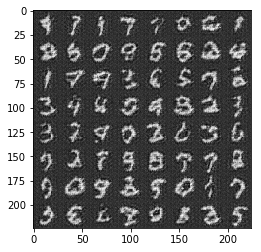

Epoch 1/2... Discriminator Loss: 0.2569... Generator Loss: 1.9442
Epoch 1/2... Discriminator Loss: 0.6287... Generator Loss: 1.0402
Epoch 1/2... Discriminator Loss: 0.9940... Generator Loss: 0.5932
Epoch 1/2... Discriminator Loss: 0.1198... Generator Loss: 2.8198
Epoch 1/2... Discriminator Loss: 0.1657... Generator Loss: 2.2993
Epoch 1/2... Discriminator Loss: 0.0966... Generator Loss: 2.7236
Epoch 1/2... Discriminator Loss: 0.0569... Generator Loss: 3.3753
Epoch 1/2... Discriminator Loss: 0.0146... Generator Loss: 4.7571
Epoch 1/2... Discriminator Loss: 0.0260... Generator Loss: 4.5803
Epoch 1/2... Discriminator Loss: 0.0205... Generator Loss: 5.6063
###out_channel_dim <class 'int'> 1


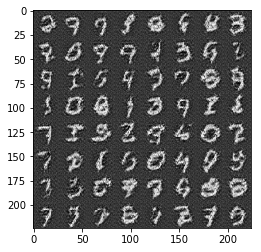

Epoch 1/2... Discriminator Loss: 0.0841... Generator Loss: 3.1710
Epoch 1/2... Discriminator Loss: 0.1243... Generator Loss: 2.6723
Epoch 1/2... Discriminator Loss: 0.2033... Generator Loss: 2.2074
Epoch 1/2... Discriminator Loss: 0.1602... Generator Loss: 2.3530
Epoch 1/2... Discriminator Loss: 0.0439... Generator Loss: 3.6521
Epoch 1/2... Discriminator Loss: 0.0248... Generator Loss: 4.6488
Epoch 1/2... Discriminator Loss: 0.0123... Generator Loss: 4.9254
Epoch 1/2... Discriminator Loss: 0.0167... Generator Loss: 5.1971
Epoch 1/2... Discriminator Loss: 0.0144... Generator Loss: 4.8348
Epoch 1/2... Discriminator Loss: 0.1291... Generator Loss: 2.2826
###out_channel_dim <class 'int'> 1


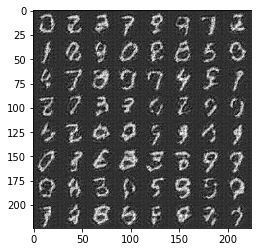

Epoch 1/2... Discriminator Loss: 0.1379... Generator Loss: 2.7046
Epoch 1/2... Discriminator Loss: 0.1763... Generator Loss: 6.6630
Epoch 1/2... Discriminator Loss: 0.1134... Generator Loss: 2.9737
Epoch 1/2... Discriminator Loss: 0.3585... Generator Loss: 1.6271
Epoch 1/2... Discriminator Loss: 0.0314... Generator Loss: 3.9090
Epoch 1/2... Discriminator Loss: 0.0986... Generator Loss: 2.8548
Epoch 1/2... Discriminator Loss: 0.0045... Generator Loss: 5.9976
Epoch 1/2... Discriminator Loss: 0.1596... Generator Loss: 2.3757
Epoch 1/2... Discriminator Loss: 0.0524... Generator Loss: 3.4590
Epoch 1/2... Discriminator Loss: 0.0728... Generator Loss: 3.1183
###out_channel_dim <class 'int'> 1


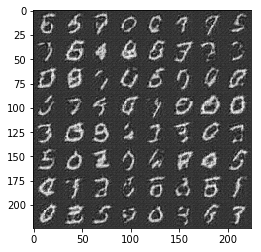

Epoch 1/2... Discriminator Loss: 0.0194... Generator Loss: 4.7904
Epoch 1/2... Discriminator Loss: 0.1877... Generator Loss: 2.3395
Epoch 1/2... Discriminator Loss: 0.0078... Generator Loss: 5.3369
Epoch 1/2... Discriminator Loss: 0.1895... Generator Loss: 7.3649
Epoch 1/2... Discriminator Loss: 1.1859... Generator Loss: 1.0783
Epoch 1/2... Discriminator Loss: 0.2521... Generator Loss: 2.1804
Epoch 1/2... Discriminator Loss: 0.3603... Generator Loss: 1.4262
Epoch 1/2... Discriminator Loss: 0.1897... Generator Loss: 2.4951
Epoch 1/2... Discriminator Loss: 1.2290... Generator Loss: 0.5127
Epoch 1/2... Discriminator Loss: 0.2741... Generator Loss: 2.8826
###out_channel_dim <class 'int'> 1


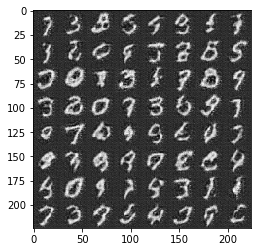

Epoch 1/2... Discriminator Loss: 0.0748... Generator Loss: 4.4946
Epoch 1/2... Discriminator Loss: 0.2709... Generator Loss: 2.9955
Epoch 1/2... Discriminator Loss: 0.5181... Generator Loss: 1.5722
Epoch 1/2... Discriminator Loss: 0.4246... Generator Loss: 1.6833
Epoch 1/2... Discriminator Loss: 0.6039... Generator Loss: 3.6837
Epoch 1/2... Discriminator Loss: 0.9043... Generator Loss: 0.9849
Epoch 1/2... Discriminator Loss: 0.3723... Generator Loss: 3.2561
Epoch 1/2... Discriminator Loss: 1.8779... Generator Loss: 0.3688
Epoch 1/2... Discriminator Loss: 0.2944... Generator Loss: 1.7174
Epoch 1/2... Discriminator Loss: 0.2900... Generator Loss: 1.6307
###out_channel_dim <class 'int'> 1


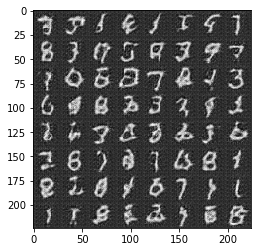

Epoch 1/2... Discriminator Loss: 0.3782... Generator Loss: 1.3876
Epoch 1/2... Discriminator Loss: 0.2188... Generator Loss: 2.2101
Epoch 1/2... Discriminator Loss: 0.1219... Generator Loss: 2.8433
Epoch 1/2... Discriminator Loss: 0.4340... Generator Loss: 1.3780
Epoch 1/2... Discriminator Loss: 0.5778... Generator Loss: 1.3033
Epoch 1/2... Discriminator Loss: 0.0994... Generator Loss: 3.9562
Epoch 1/2... Discriminator Loss: 2.5274... Generator Loss: 0.1124
Epoch 1/2... Discriminator Loss: 0.1345... Generator Loss: 2.5012
Epoch 1/2... Discriminator Loss: 0.3152... Generator Loss: 2.0438
Epoch 1/2... Discriminator Loss: 0.1869... Generator Loss: 2.4374
###out_channel_dim <class 'int'> 1


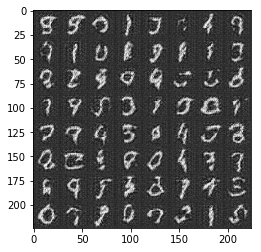

Epoch 1/2... Discriminator Loss: 0.4614... Generator Loss: 1.6308
Epoch 1/2... Discriminator Loss: 0.1962... Generator Loss: 2.2062
Epoch 1/2... Discriminator Loss: 0.8290... Generator Loss: 0.6937
Epoch 1/2... Discriminator Loss: 0.2569... Generator Loss: 1.7263
Epoch 1/2... Discriminator Loss: 0.7503... Generator Loss: 0.7664
Epoch 1/2... Discriminator Loss: 0.1610... Generator Loss: 2.6826
Epoch 1/2... Discriminator Loss: 0.0519... Generator Loss: 3.5265
Epoch 1/2... Discriminator Loss: 0.0788... Generator Loss: 3.8836
Epoch 1/2... Discriminator Loss: 0.2194... Generator Loss: 2.1892
Epoch 1/2... Discriminator Loss: 0.2053... Generator Loss: 2.2252
###out_channel_dim <class 'int'> 1


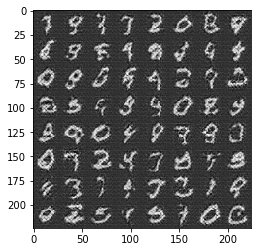

Epoch 1/2... Discriminator Loss: 0.0698... Generator Loss: 3.1233
Epoch 1/2... Discriminator Loss: 0.0878... Generator Loss: 2.9967
Epoch 1/2... Discriminator Loss: 0.1060... Generator Loss: 3.0659
Epoch 1/2... Discriminator Loss: 0.4511... Generator Loss: 1.5207
Epoch 1/2... Discriminator Loss: 0.1931... Generator Loss: 2.0872
Epoch 1/2... Discriminator Loss: 0.0319... Generator Loss: 4.0687
Epoch 1/2... Discriminator Loss: 0.0090... Generator Loss: 5.2910
Epoch 1/2... Discriminator Loss: 0.1420... Generator Loss: 2.4305
Epoch 1/2... Discriminator Loss: 0.4945... Generator Loss: 1.2107
Epoch 1/2... Discriminator Loss: 0.2397... Generator Loss: 1.6403
###out_channel_dim <class 'int'> 1


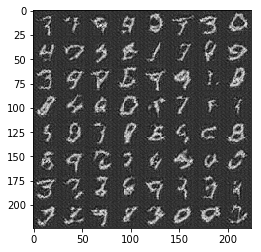

Epoch 1/2... Discriminator Loss: 1.4068... Generator Loss: 0.5708
Epoch 1/2... Discriminator Loss: 0.1576... Generator Loss: 2.4462
Epoch 1/2... Discriminator Loss: 0.4357... Generator Loss: 1.4355
Epoch 1/2... Discriminator Loss: 16.4848... Generator Loss: 20.0356
Epoch 1/2... Discriminator Loss: 0.4071... Generator Loss: 2.6458
Epoch 1/2... Discriminator Loss: 1.1535... Generator Loss: 0.5174
Epoch 1/2... Discriminator Loss: 0.6098... Generator Loss: 2.7132
Epoch 1/2... Discriminator Loss: 0.3863... Generator Loss: 1.4991
Epoch 1/2... Discriminator Loss: 0.4566... Generator Loss: 1.8739
Epoch 1/2... Discriminator Loss: 0.2009... Generator Loss: 2.4829
###out_channel_dim <class 'int'> 1


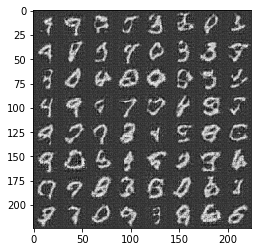

Epoch 1/2... Discriminator Loss: 2.2007... Generator Loss: 0.2060
Epoch 1/2... Discriminator Loss: 0.2632... Generator Loss: 2.0528
Epoch 1/2... Discriminator Loss: 1.2289... Generator Loss: 0.6088
Epoch 1/2... Discriminator Loss: 0.1879... Generator Loss: 2.1213
Epoch 1/2... Discriminator Loss: 0.2456... Generator Loss: 2.1275
Epoch 1/2... Discriminator Loss: 0.0987... Generator Loss: 3.3733
Epoch 1/2... Discriminator Loss: 0.0927... Generator Loss: 2.9169
Epoch 1/2... Discriminator Loss: 0.2671... Generator Loss: 1.5748
Epoch 1/2... Discriminator Loss: 0.5776... Generator Loss: 1.2208
Epoch 1/2... Discriminator Loss: 0.4770... Generator Loss: 1.4126
###out_channel_dim <class 'int'> 1


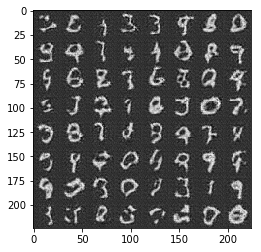

Epoch 1/2... Discriminator Loss: 0.2210... Generator Loss: 2.3289
Epoch 1/2... Discriminator Loss: 0.2554... Generator Loss: 1.9251
Epoch 1/2... Discriminator Loss: 1.1502... Generator Loss: 3.8418
Epoch 1/2... Discriminator Loss: 0.4257... Generator Loss: 1.6119
Epoch 1/2... Discriminator Loss: 0.3377... Generator Loss: 1.5632
Epoch 1/2... Discriminator Loss: 0.2625... Generator Loss: 2.8195
Epoch 1/2... Discriminator Loss: 0.5435... Generator Loss: 1.2802
Epoch 1/2... Discriminator Loss: 0.5288... Generator Loss: 1.4631
Epoch 1/2... Discriminator Loss: 0.4720... Generator Loss: 1.4419
Epoch 1/2... Discriminator Loss: 0.1553... Generator Loss: 2.3956
###out_channel_dim <class 'int'> 1


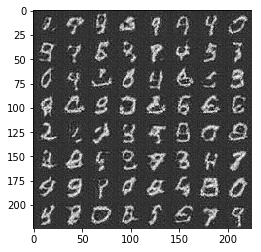

Epoch 1/2... Discriminator Loss: 0.1265... Generator Loss: 2.5303
Epoch 1/2... Discriminator Loss: 0.0308... Generator Loss: 4.9017
Epoch 1/2... Discriminator Loss: 0.5915... Generator Loss: 1.0991
Epoch 1/2... Discriminator Loss: 0.0773... Generator Loss: 3.0630
Epoch 1/2... Discriminator Loss: 0.3363... Generator Loss: 1.3762
Epoch 1/2... Discriminator Loss: 5.4476... Generator Loss: 11.5776
Epoch 1/2... Discriminator Loss: 0.1692... Generator Loss: 2.2292
Epoch 1/2... Discriminator Loss: 0.4310... Generator Loss: 3.2409
Epoch 1/2... Discriminator Loss: 0.3794... Generator Loss: 2.2465
Epoch 1/2... Discriminator Loss: 0.3472... Generator Loss: 2.0010
###out_channel_dim <class 'int'> 1


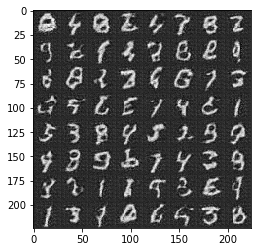

Epoch 1/2... Discriminator Loss: 0.3499... Generator Loss: 1.5455
Epoch 1/2... Discriminator Loss: 0.6658... Generator Loss: 0.9313
Epoch 1/2... Discriminator Loss: 0.4304... Generator Loss: 1.2457
Epoch 1/2... Discriminator Loss: 0.2662... Generator Loss: 1.7710
Epoch 1/2... Discriminator Loss: 0.2423... Generator Loss: 1.8890
Epoch 1/2... Discriminator Loss: 0.2682... Generator Loss: 1.7155
Epoch 1/2... Discriminator Loss: 0.2238... Generator Loss: 2.2566
Epoch 1/2... Discriminator Loss: 0.1903... Generator Loss: 1.9963
Epoch 1/2... Discriminator Loss: 0.2907... Generator Loss: 5.6402
Epoch 1/2... Discriminator Loss: 0.7181... Generator Loss: 4.0952
###out_channel_dim <class 'int'> 1


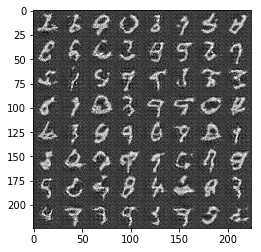

Epoch 1/2... Discriminator Loss: 0.0797... Generator Loss: 3.2073
Epoch 1/2... Discriminator Loss: 0.2226... Generator Loss: 2.1575
Epoch 1/2... Discriminator Loss: 0.6387... Generator Loss: 1.0050
Epoch 1/2... Discriminator Loss: 0.2356... Generator Loss: 2.5974
Epoch 1/2... Discriminator Loss: 0.4442... Generator Loss: 1.5709
Epoch 1/2... Discriminator Loss: 0.2799... Generator Loss: 1.5845
Epoch 1/2... Discriminator Loss: 0.6221... Generator Loss: 1.0851
Epoch 1/2... Discriminator Loss: 0.5908... Generator Loss: 1.2263
Epoch 1/2... Discriminator Loss: 0.1410... Generator Loss: 3.3175
Epoch 1/2... Discriminator Loss: 0.3081... Generator Loss: 2.1362
###out_channel_dim <class 'int'> 1


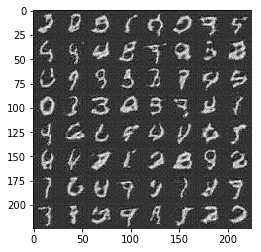

Epoch 1/2... Discriminator Loss: 0.4331... Generator Loss: 1.1815
Epoch 1/2... Discriminator Loss: 0.1397... Generator Loss: 2.6545
Epoch 1/2... Discriminator Loss: 0.3482... Generator Loss: 1.5375
Epoch 1/2... Discriminator Loss: 0.1736... Generator Loss: 2.3932
Epoch 1/2... Discriminator Loss: 0.3904... Generator Loss: 1.7281
Epoch 1/2... Discriminator Loss: 0.0989... Generator Loss: 2.6134
Epoch 1/2... Discriminator Loss: 0.4881... Generator Loss: 1.5134
Epoch 1/2... Discriminator Loss: 1.6323... Generator Loss: 0.3802
Epoch 1/2... Discriminator Loss: 0.1157... Generator Loss: 5.5299
Epoch 1/2... Discriminator Loss: 0.3294... Generator Loss: 2.0620
###out_channel_dim <class 'int'> 1


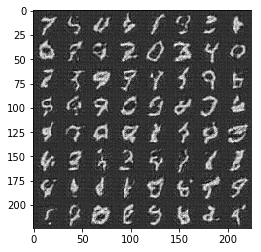

Epoch 1/2... Discriminator Loss: 0.1193... Generator Loss: 2.7101
Epoch 1/2... Discriminator Loss: 0.8117... Generator Loss: 0.8912
Epoch 1/2... Discriminator Loss: 0.1039... Generator Loss: 2.8718
Epoch 1/2... Discriminator Loss: 0.3606... Generator Loss: 1.7111
Epoch 1/2... Discriminator Loss: 0.1076... Generator Loss: 4.0597
Epoch 1/2... Discriminator Loss: 2.2139... Generator Loss: 0.2373
Epoch 1/2... Discriminator Loss: 0.8415... Generator Loss: 5.1681
Epoch 1/2... Discriminator Loss: 0.3324... Generator Loss: 2.3949
Epoch 1/2... Discriminator Loss: 0.9803... Generator Loss: 6.6374
Epoch 1/2... Discriminator Loss: 0.5173... Generator Loss: 1.3363
###out_channel_dim <class 'int'> 1


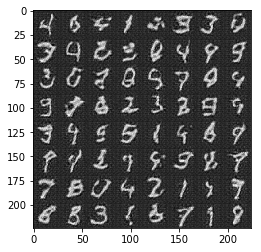

Epoch 1/2... Discriminator Loss: 0.6094... Generator Loss: 0.8896
Epoch 1/2... Discriminator Loss: 0.2735... Generator Loss: 1.9792
Epoch 1/2... Discriminator Loss: 0.0440... Generator Loss: 3.6648
Epoch 1/2... Discriminator Loss: 0.8246... Generator Loss: 0.8243
Epoch 1/2... Discriminator Loss: 0.3788... Generator Loss: 1.2803
Epoch 1/2... Discriminator Loss: 0.2393... Generator Loss: 2.0517
Epoch 1/2... Discriminator Loss: 0.1981... Generator Loss: 2.3470
Epoch 1/2... Discriminator Loss: 0.4211... Generator Loss: 1.4232
Epoch 1/2... Discriminator Loss: 0.0243... Generator Loss: 4.1152
Epoch 1/2... Discriminator Loss: 0.1560... Generator Loss: 2.4549
###out_channel_dim <class 'int'> 1


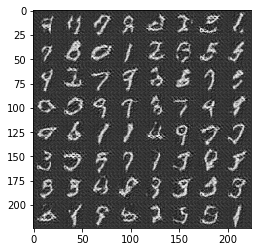

Epoch 1/2... Discriminator Loss: 0.3743... Generator Loss: 1.8885
Epoch 1/2... Discriminator Loss: 0.0432... Generator Loss: 3.9387
Epoch 1/2... Discriminator Loss: 0.0649... Generator Loss: 3.1070
Epoch 1/2... Discriminator Loss: 0.1639... Generator Loss: 2.0136
Epoch 1/2... Discriminator Loss: 0.0536... Generator Loss: 3.5519
Epoch 1/2... Discriminator Loss: 0.0172... Generator Loss: 4.8911
Epoch 1/2... Discriminator Loss: 0.9207... Generator Loss: 0.5938
Epoch 1/2... Discriminator Loss: 0.0947... Generator Loss: 2.8637
Epoch 1/2... Discriminator Loss: 0.1535... Generator Loss: 2.1638
Epoch 1/2... Discriminator Loss: 0.3283... Generator Loss: 1.5364
###out_channel_dim <class 'int'> 1


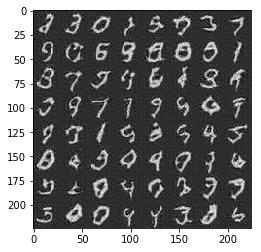

Epoch 1/2... Discriminator Loss: 0.1634... Generator Loss: 2.3916
Epoch 1/2... Discriminator Loss: 0.1397... Generator Loss: 2.4119
Epoch 1/2... Discriminator Loss: 0.0433... Generator Loss: 3.5224
Epoch 1/2... Discriminator Loss: 0.3879... Generator Loss: 1.3519
Epoch 1/2... Discriminator Loss: 0.0459... Generator Loss: 3.7793
Epoch 1/2... Discriminator Loss: 0.0518... Generator Loss: 3.5422
Epoch 1/2... Discriminator Loss: 0.0346... Generator Loss: 3.7840
Epoch 1/2... Discriminator Loss: 0.0341... Generator Loss: 5.3806
Epoch 1/2... Discriminator Loss: 0.0295... Generator Loss: 4.5993
Epoch 1/2... Discriminator Loss: 0.2321... Generator Loss: 1.9795
###out_channel_dim <class 'int'> 1


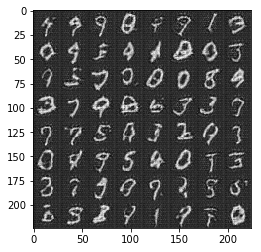

Epoch 1/2... Discriminator Loss: 0.1744... Generator Loss: 4.4222
Epoch 1/2... Discriminator Loss: 0.1857... Generator Loss: 2.2890
Epoch 1/2... Discriminator Loss: 0.0459... Generator Loss: 5.2008
Epoch 1/2... Discriminator Loss: 0.5140... Generator Loss: 1.3114
Epoch 1/2... Discriminator Loss: 2.1344... Generator Loss: 7.7220
Epoch 1/2... Discriminator Loss: 0.1021... Generator Loss: 3.4196
Epoch 1/2... Discriminator Loss: 0.2906... Generator Loss: 1.6273
Epoch 1/2... Discriminator Loss: 0.2588... Generator Loss: 1.9500
Epoch 1/2... Discriminator Loss: 0.3634... Generator Loss: 2.0544
Epoch 1/2... Discriminator Loss: 0.2783... Generator Loss: 1.6132
###out_channel_dim <class 'int'> 1


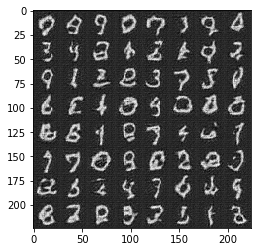

Epoch 1/2... Discriminator Loss: 3.5289... Generator Loss: 0.0771
Epoch 1/2... Discriminator Loss: 0.2344... Generator Loss: 2.5958
Epoch 1/2... Discriminator Loss: 0.1015... Generator Loss: 3.2874
Epoch 1/2... Discriminator Loss: 1.9987... Generator Loss: 0.2729
Epoch 1/2... Discriminator Loss: 0.6500... Generator Loss: 0.9361
Epoch 1/2... Discriminator Loss: 0.8924... Generator Loss: 0.9529
Epoch 1/2... Discriminator Loss: 1.3891... Generator Loss: 0.3517
Epoch 1/2... Discriminator Loss: 0.2035... Generator Loss: 2.0290
Epoch 1/2... Discriminator Loss: 0.5625... Generator Loss: 1.2563
Epoch 1/2... Discriminator Loss: 0.3958... Generator Loss: 1.6868
###out_channel_dim <class 'int'> 1


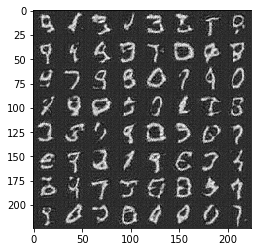

Epoch 1/2... Discriminator Loss: 0.2752... Generator Loss: 1.8618
Epoch 1/2... Discriminator Loss: 0.3268... Generator Loss: 1.7968
Epoch 1/2... Discriminator Loss: 0.5475... Generator Loss: 1.0790
Epoch 1/2... Discriminator Loss: 1.1604... Generator Loss: 5.9641
Epoch 1/2... Discriminator Loss: 0.1446... Generator Loss: 2.7888
Epoch 1/2... Discriminator Loss: 0.6523... Generator Loss: 0.9853
Epoch 1/2... Discriminator Loss: 0.4425... Generator Loss: 1.4803
Epoch 1/2... Discriminator Loss: 0.2247... Generator Loss: 1.7178
Epoch 1/2... Discriminator Loss: 0.5276... Generator Loss: 1.0274
Epoch 1/2... Discriminator Loss: 0.3844... Generator Loss: 1.9868
###out_channel_dim <class 'int'> 1


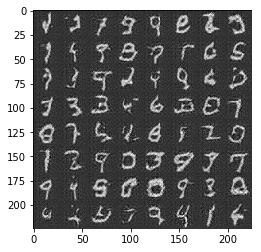

Epoch 1/2... Discriminator Loss: 0.1378... Generator Loss: 2.6957
Epoch 1/2... Discriminator Loss: 0.4587... Generator Loss: 1.4244
Epoch 1/2... Discriminator Loss: 0.3818... Generator Loss: 1.4094
Epoch 1/2... Discriminator Loss: 0.5413... Generator Loss: 1.4109
Epoch 1/2... Discriminator Loss: 4.1992... Generator Loss: 6.7013
Epoch 1/2... Discriminator Loss: 0.7187... Generator Loss: 1.1933
Epoch 1/2... Discriminator Loss: 1.8632... Generator Loss: 0.4851
Epoch 1/2... Discriminator Loss: 0.4769... Generator Loss: 1.7768
Epoch 1/2... Discriminator Loss: 0.6239... Generator Loss: 0.9600
Epoch 1/2... Discriminator Loss: 0.3559... Generator Loss: 1.6347
###out_channel_dim <class 'int'> 1


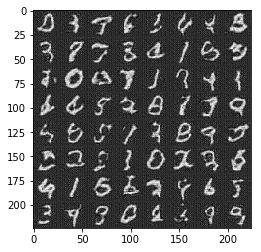

Epoch 1/2... Discriminator Loss: 0.0879... Generator Loss: 3.3590
Epoch 1/2... Discriminator Loss: 0.1756... Generator Loss: 2.3976
Epoch 1/2... Discriminator Loss: 0.3133... Generator Loss: 2.2034
Epoch 1/2... Discriminator Loss: 0.1826... Generator Loss: 2.1410
Epoch 1/2... Discriminator Loss: 0.5195... Generator Loss: 1.1220
Epoch 1/2... Discriminator Loss: 0.2436... Generator Loss: 1.8946
Epoch 1/2... Discriminator Loss: 0.1238... Generator Loss: 2.9135
Epoch 1/2... Discriminator Loss: 1.3754... Generator Loss: 0.4828
Epoch 1/2... Discriminator Loss: 0.5398... Generator Loss: 1.0494
Epoch 1/2... Discriminator Loss: 0.2507... Generator Loss: 2.6793
###out_channel_dim <class 'int'> 1


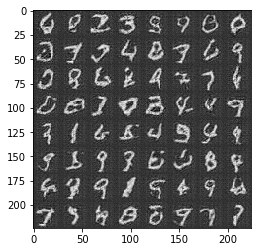

Epoch 1/2... Discriminator Loss: 0.4543... Generator Loss: 1.2585
Epoch 1/2... Discriminator Loss: 0.1613... Generator Loss: 2.3919
Epoch 1/2... Discriminator Loss: 0.3008... Generator Loss: 1.9992
Epoch 1/2... Discriminator Loss: 0.5569... Generator Loss: 1.0874
Epoch 1/2... Discriminator Loss: 0.8533... Generator Loss: 0.9326
Epoch 1/2... Discriminator Loss: 0.0837... Generator Loss: 2.8289
Epoch 1/2... Discriminator Loss: 0.1158... Generator Loss: 3.8347
Epoch 1/2... Discriminator Loss: 5.2039... Generator Loss: 9.1852
Epoch 1/2... Discriminator Loss: 0.3633... Generator Loss: 4.7879
Epoch 1/2... Discriminator Loss: 0.7644... Generator Loss: 0.8776
###out_channel_dim <class 'int'> 1


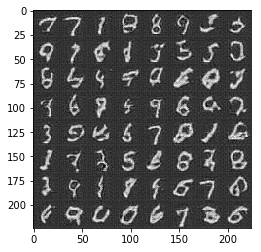

Epoch 1/2... Discriminator Loss: 0.2517... Generator Loss: 2.1955
Epoch 1/2... Discriminator Loss: 0.3037... Generator Loss: 1.6574
Epoch 1/2... Discriminator Loss: 0.1113... Generator Loss: 3.9007
Epoch 1/2... Discriminator Loss: 1.3277... Generator Loss: 0.4470
Epoch 1/2... Discriminator Loss: 0.3078... Generator Loss: 1.7661
Epoch 1/2... Discriminator Loss: 1.3112... Generator Loss: 0.6062
Epoch 1/2... Discriminator Loss: 0.0331... Generator Loss: 4.3607
Epoch 1/2... Discriminator Loss: 0.4939... Generator Loss: 1.5055
Epoch 1/2... Discriminator Loss: 0.3552... Generator Loss: 1.5042
Epoch 1/2... Discriminator Loss: 0.1003... Generator Loss: 3.1682
###out_channel_dim <class 'int'> 1


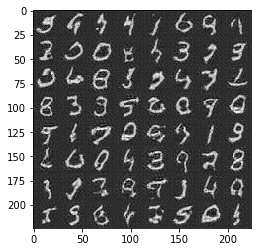

Epoch 1/2... Discriminator Loss: 0.1917... Generator Loss: 2.6095
Epoch 1/2... Discriminator Loss: 0.2273... Generator Loss: 2.1853
Epoch 1/2... Discriminator Loss: 0.0453... Generator Loss: 3.6981
Epoch 1/2... Discriminator Loss: 0.1294... Generator Loss: 2.8989
Epoch 1/2... Discriminator Loss: 0.3226... Generator Loss: 1.6104
Epoch 1/2... Discriminator Loss: 0.3673... Generator Loss: 1.5873
Epoch 1/2... Discriminator Loss: 0.3935... Generator Loss: 1.8438
Epoch 1/2... Discriminator Loss: 0.6663... Generator Loss: 1.2382
Epoch 1/2... Discriminator Loss: 0.0890... Generator Loss: 2.8749
Epoch 1/2... Discriminator Loss: 0.2632... Generator Loss: 1.8193
###out_channel_dim <class 'int'> 1


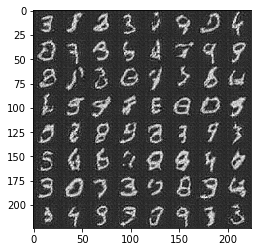

Epoch 1/2... Discriminator Loss: 0.0572... Generator Loss: 4.1312
Epoch 1/2... Discriminator Loss: 0.0230... Generator Loss: 4.1056
Epoch 1/2... Discriminator Loss: 0.2866... Generator Loss: 1.7408
Epoch 1/2... Discriminator Loss: 0.0037... Generator Loss: 6.2191
Epoch 1/2... Discriminator Loss: 0.0673... Generator Loss: 3.3127
Epoch 1/2... Discriminator Loss: 0.0255... Generator Loss: 4.3162
Epoch 1/2... Discriminator Loss: 0.2121... Generator Loss: 2.0248
Epoch 1/2... Discriminator Loss: 0.1673... Generator Loss: 2.1083
Epoch 1/2... Discriminator Loss: 0.0250... Generator Loss: 4.0556
Epoch 1/2... Discriminator Loss: 0.3905... Generator Loss: 1.5409
###out_channel_dim <class 'int'> 1


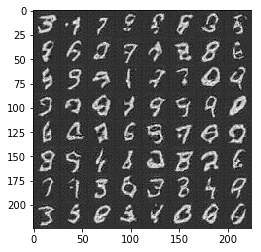

Epoch 1/2... Discriminator Loss: 0.1605... Generator Loss: 2.3937
Epoch 1/2... Discriminator Loss: 0.8955... Generator Loss: 1.1043
Epoch 1/2... Discriminator Loss: 0.0347... Generator Loss: 3.9586
Epoch 1/2... Discriminator Loss: 0.0990... Generator Loss: 3.9984
Epoch 1/2... Discriminator Loss: 0.5327... Generator Loss: 1.1056
Epoch 1/2... Discriminator Loss: 0.0846... Generator Loss: 2.8553
Epoch 1/2... Discriminator Loss: 0.3084... Generator Loss: 2.0003
Epoch 1/2... Discriminator Loss: 0.0457... Generator Loss: 4.4134
Epoch 1/2... Discriminator Loss: 0.0504... Generator Loss: 3.4757
Epoch 1/2... Discriminator Loss: 0.0395... Generator Loss: 3.8300
###out_channel_dim <class 'int'> 1


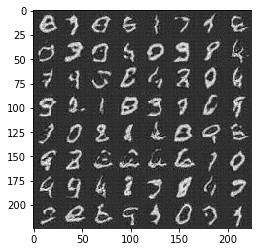

Epoch 1/2... Discriminator Loss: 0.1508... Generator Loss: 2.3861
Epoch 1/2... Discriminator Loss: 0.0956... Generator Loss: 2.7392
Epoch 1/2... Discriminator Loss: 0.4304... Generator Loss: 5.3184
Epoch 1/2... Discriminator Loss: 1.8300... Generator Loss: 0.2576
Epoch 1/2... Discriminator Loss: 1.5155... Generator Loss: 0.5947
Epoch 1/2... Discriminator Loss: 0.8272... Generator Loss: 1.1819
Epoch 1/2... Discriminator Loss: 0.1535... Generator Loss: 2.6064
Epoch 1/2... Discriminator Loss: 0.1819... Generator Loss: 3.8636
Epoch 1/2... Discriminator Loss: 0.2767... Generator Loss: 2.3326
Epoch 1/2... Discriminator Loss: 0.3123... Generator Loss: 2.0978
###out_channel_dim <class 'int'> 1


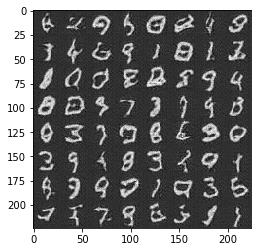

Epoch 1/2... Discriminator Loss: 0.1239... Generator Loss: 2.5943
Epoch 1/2... Discriminator Loss: 1.6337... Generator Loss: 0.4244
Epoch 1/2... Discriminator Loss: 0.3028... Generator Loss: 2.2208
Epoch 1/2... Discriminator Loss: 0.4405... Generator Loss: 1.5577
Epoch 1/2... Discriminator Loss: 0.6008... Generator Loss: 1.0210
Epoch 1/2... Discriminator Loss: 0.1331... Generator Loss: 2.9224
Epoch 1/2... Discriminator Loss: 0.1084... Generator Loss: 3.0521
Epoch 1/2... Discriminator Loss: 0.3369... Generator Loss: 1.7028
Epoch 1/2... Discriminator Loss: 0.1581... Generator Loss: 2.7230
Epoch 1/2... Discriminator Loss: 0.7560... Generator Loss: 0.7106
###out_channel_dim <class 'int'> 1


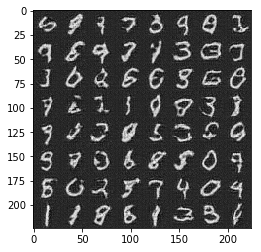

Epoch 1/2... Discriminator Loss: 0.6390... Generator Loss: 1.5666
Epoch 1/2... Discriminator Loss: 0.6779... Generator Loss: 1.0324
Epoch 1/2... Discriminator Loss: 1.1222... Generator Loss: 0.5666
Epoch 1/2... Discriminator Loss: 1.4210... Generator Loss: 0.3165
Epoch 1/2... Discriminator Loss: 0.5697... Generator Loss: 1.1141
Epoch 1/2... Discriminator Loss: 0.8054... Generator Loss: 0.9904
Epoch 1/2... Discriminator Loss: 0.6129... Generator Loss: 2.2457
Epoch 1/2... Discriminator Loss: 0.2893... Generator Loss: 1.5763
Epoch 1/2... Discriminator Loss: 0.2203... Generator Loss: 1.9716
Epoch 1/2... Discriminator Loss: 0.3169... Generator Loss: 1.7839
###out_channel_dim <class 'int'> 1


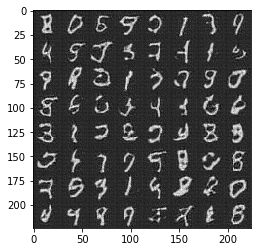

Epoch 1/2... Discriminator Loss: 0.1499... Generator Loss: 2.2330
Epoch 1/2... Discriminator Loss: 0.5386... Generator Loss: 1.2078
Epoch 1/2... Discriminator Loss: 0.0455... Generator Loss: 4.3782
Epoch 1/2... Discriminator Loss: 0.2174... Generator Loss: 1.9883
Epoch 1/2... Discriminator Loss: 0.2232... Generator Loss: 1.8442
Epoch 1/2... Discriminator Loss: 0.0654... Generator Loss: 2.9146
Epoch 1/2... Discriminator Loss: 0.4749... Generator Loss: 1.3364
Epoch 1/2... Discriminator Loss: 2.1597... Generator Loss: 0.3421
Epoch 1/2... Discriminator Loss: 1.1675... Generator Loss: 0.7066
Epoch 1/2... Discriminator Loss: 0.1524... Generator Loss: 3.2244
###out_channel_dim <class 'int'> 1


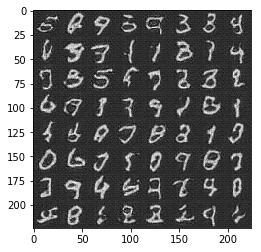

Epoch 1/2... Discriminator Loss: 2.2894... Generator Loss: 0.1613
Epoch 1/2... Discriminator Loss: 0.0987... Generator Loss: 3.7254
Epoch 1/2... Discriminator Loss: 0.0670... Generator Loss: 3.5076
Epoch 1/2... Discriminator Loss: 0.4622... Generator Loss: 1.2817
Epoch 1/2... Discriminator Loss: 0.2423... Generator Loss: 2.3292
Epoch 1/2... Discriminator Loss: 0.5989... Generator Loss: 0.9955
Epoch 1/2... Discriminator Loss: 0.5383... Generator Loss: 1.1361
Epoch 1/2... Discriminator Loss: 0.1723... Generator Loss: 2.0882
Epoch 1/2... Discriminator Loss: 0.6198... Generator Loss: 1.4537
Epoch 1/2... Discriminator Loss: 0.9018... Generator Loss: 4.4139
###out_channel_dim <class 'int'> 1


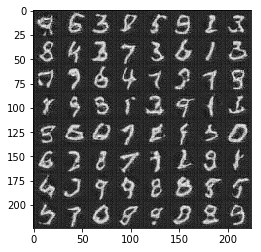

Epoch 1/2... Discriminator Loss: 0.4451... Generator Loss: 1.5091
Epoch 1/2... Discriminator Loss: 0.1140... Generator Loss: 2.5646
Epoch 1/2... Discriminator Loss: 0.3426... Generator Loss: 2.2046
Epoch 1/2... Discriminator Loss: 0.1161... Generator Loss: 2.9177
Epoch 1/2... Discriminator Loss: 0.7086... Generator Loss: 0.9811
Epoch 1/2... Discriminator Loss: 0.3643... Generator Loss: 1.6768
Epoch 1/2... Discriminator Loss: 0.4090... Generator Loss: 1.5848
Epoch 1/2... Discriminator Loss: 0.4882... Generator Loss: 1.3571
Epoch 1/2... Discriminator Loss: 0.1962... Generator Loss: 3.4515
Epoch 1/2... Discriminator Loss: 0.2970... Generator Loss: 3.3542
###out_channel_dim <class 'int'> 1


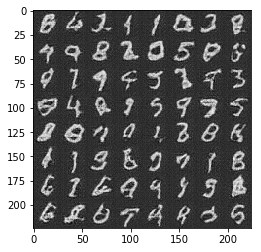

Epoch 1/2... Discriminator Loss: 0.1267... Generator Loss: 2.9352
Epoch 1/2... Discriminator Loss: 0.2491... Generator Loss: 2.7726
Epoch 1/2... Discriminator Loss: 0.8307... Generator Loss: 0.9023
Epoch 1/2... Discriminator Loss: 0.3627... Generator Loss: 1.4219
Epoch 1/2... Discriminator Loss: 0.0964... Generator Loss: 3.0706
Epoch 1/2... Discriminator Loss: 1.9596... Generator Loss: 0.2019
Epoch 1/2... Discriminator Loss: 0.4116... Generator Loss: 4.9300
Epoch 1/2... Discriminator Loss: 0.3206... Generator Loss: 1.4682
Epoch 1/2... Discriminator Loss: 0.6340... Generator Loss: 1.3955
Epoch 1/2... Discriminator Loss: 0.2605... Generator Loss: 2.0185
###out_channel_dim <class 'int'> 1


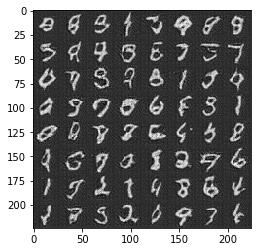

Epoch 1/2... Discriminator Loss: 0.4277... Generator Loss: 1.1502
Epoch 1/2... Discriminator Loss: 0.5995... Generator Loss: 1.1094
Epoch 1/2... Discriminator Loss: 0.1255... Generator Loss: 2.5683
Epoch 1/2... Discriminator Loss: 0.7242... Generator Loss: 0.8859
Epoch 1/2... Discriminator Loss: 0.1851... Generator Loss: 2.0519
Epoch 1/2... Discriminator Loss: 0.7266... Generator Loss: 0.7796
Epoch 1/2... Discriminator Loss: 0.1926... Generator Loss: 2.3931
Epoch 1/2... Discriminator Loss: 0.1820... Generator Loss: 2.2144
Epoch 1/2... Discriminator Loss: 0.2277... Generator Loss: 2.1765
Epoch 1/2... Discriminator Loss: 0.4942... Generator Loss: 1.2404
###out_channel_dim <class 'int'> 1


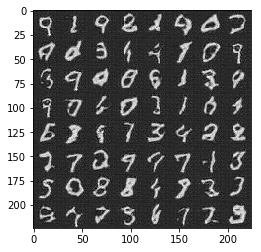

Epoch 1/2... Discriminator Loss: 0.4517... Generator Loss: 1.2105
Epoch 1/2... Discriminator Loss: 0.1296... Generator Loss: 2.6091
Epoch 1/2... Discriminator Loss: 0.0911... Generator Loss: 3.0201
Epoch 1/2... Discriminator Loss: 0.2003... Generator Loss: 2.1443
Epoch 1/2... Discriminator Loss: 0.9967... Generator Loss: 0.5791
Epoch 1/2... Discriminator Loss: 0.1432... Generator Loss: 2.4814
Epoch 1/2... Discriminator Loss: 0.0553... Generator Loss: 4.0860
Epoch 1/2... Discriminator Loss: 0.1638... Generator Loss: 2.6147
Epoch 1/2... Discriminator Loss: 0.0285... Generator Loss: 3.7974
Epoch 1/2... Discriminator Loss: 0.2682... Generator Loss: 1.8415
###out_channel_dim <class 'int'> 1


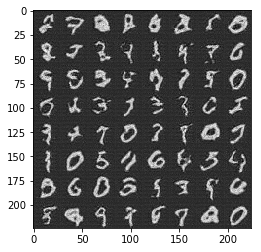

Epoch 1/2... Discriminator Loss: 0.1660... Generator Loss: 2.3203
Epoch 1/2... Discriminator Loss: 1.5030... Generator Loss: 0.4234
Epoch 1/2... Discriminator Loss: 0.2485... Generator Loss: 1.8529
Epoch 1/2... Discriminator Loss: 0.0775... Generator Loss: 3.0213
Epoch 1/2... Discriminator Loss: 0.8687... Generator Loss: 1.1871
Epoch 1/2... Discriminator Loss: 0.1974... Generator Loss: 2.3005
Epoch 1/2... Discriminator Loss: 0.0687... Generator Loss: 4.3147
Epoch 1/2... Discriminator Loss: 0.2192... Generator Loss: 2.0036
Epoch 1/2... Discriminator Loss: 0.0875... Generator Loss: 3.0878
Epoch 1/2... Discriminator Loss: 0.3705... Generator Loss: 1.4149
###out_channel_dim <class 'int'> 1


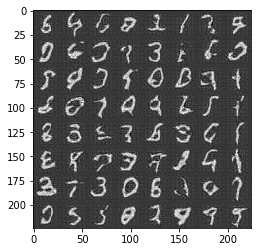

Epoch 2/2... Discriminator Loss: 0.8245... Generator Loss: 5.2941
Epoch 2/2... Discriminator Loss: 0.4025... Generator Loss: 1.6925
Epoch 2/2... Discriminator Loss: 0.0728... Generator Loss: 3.8784
Epoch 2/2... Discriminator Loss: 0.1316... Generator Loss: 2.5519
Epoch 2/2... Discriminator Loss: 0.6400... Generator Loss: 1.2120
Epoch 2/2... Discriminator Loss: 0.5618... Generator Loss: 1.2992
Epoch 2/2... Discriminator Loss: 0.2017... Generator Loss: 2.4822
Epoch 2/2... Discriminator Loss: 0.3915... Generator Loss: 1.2873
Epoch 2/2... Discriminator Loss: 0.5248... Generator Loss: 2.0878
Epoch 2/2... Discriminator Loss: 0.2974... Generator Loss: 1.9023
###out_channel_dim <class 'int'> 1


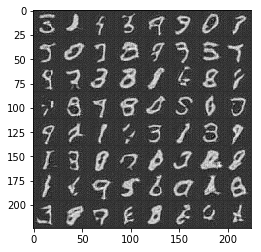

Epoch 2/2... Discriminator Loss: 1.0630... Generator Loss: 5.2305
Epoch 2/2... Discriminator Loss: 0.5127... Generator Loss: 1.0043
Epoch 2/2... Discriminator Loss: 0.4872... Generator Loss: 1.6239
Epoch 2/2... Discriminator Loss: 0.4974... Generator Loss: 1.1012
Epoch 2/2... Discriminator Loss: 0.4569... Generator Loss: 1.5252
Epoch 2/2... Discriminator Loss: 0.1750... Generator Loss: 2.2783
Epoch 2/2... Discriminator Loss: 0.0951... Generator Loss: 3.0681
Epoch 2/2... Discriminator Loss: 0.2082... Generator Loss: 3.4966
Epoch 2/2... Discriminator Loss: 0.7146... Generator Loss: 1.2067
Epoch 2/2... Discriminator Loss: 1.1435... Generator Loss: 0.5589
###out_channel_dim <class 'int'> 1


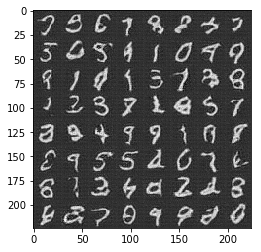

Epoch 2/2... Discriminator Loss: 1.8691... Generator Loss: 0.3631
Epoch 2/2... Discriminator Loss: 0.1997... Generator Loss: 2.1964
Epoch 2/2... Discriminator Loss: 1.7975... Generator Loss: 0.2506
Epoch 2/2... Discriminator Loss: 0.9168... Generator Loss: 4.1690
Epoch 2/2... Discriminator Loss: 1.0055... Generator Loss: 0.6829
Epoch 2/2... Discriminator Loss: 0.2910... Generator Loss: 1.9448
Epoch 2/2... Discriminator Loss: 0.1936... Generator Loss: 2.3609
Epoch 2/2... Discriminator Loss: 0.5065... Generator Loss: 1.2195
Epoch 2/2... Discriminator Loss: 0.2337... Generator Loss: 2.2840
Epoch 2/2... Discriminator Loss: 0.6215... Generator Loss: 1.1382
###out_channel_dim <class 'int'> 1


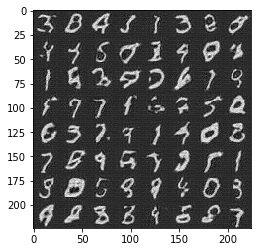

Epoch 2/2... Discriminator Loss: 0.6680... Generator Loss: 1.3088
Epoch 2/2... Discriminator Loss: 1.0620... Generator Loss: 0.6084
Epoch 2/2... Discriminator Loss: 1.0901... Generator Loss: 0.4898
Epoch 2/2... Discriminator Loss: 0.7817... Generator Loss: 0.8435
Epoch 2/2... Discriminator Loss: 0.1992... Generator Loss: 2.0759
Epoch 2/2... Discriminator Loss: 0.1787... Generator Loss: 2.2053
Epoch 2/2... Discriminator Loss: 0.1589... Generator Loss: 2.2781
Epoch 2/2... Discriminator Loss: 0.4159... Generator Loss: 1.2379
Epoch 2/2... Discriminator Loss: 0.9867... Generator Loss: 0.5677
Epoch 2/2... Discriminator Loss: 0.8244... Generator Loss: 0.7723
###out_channel_dim <class 'int'> 1


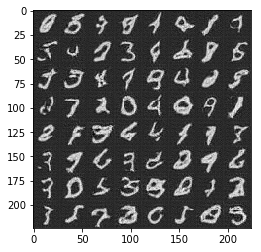

Epoch 2/2... Discriminator Loss: 0.4933... Generator Loss: 5.8404
Epoch 2/2... Discriminator Loss: 1.9725... Generator Loss: 0.3001
Epoch 2/2... Discriminator Loss: 0.8676... Generator Loss: 0.6755
Epoch 2/2... Discriminator Loss: 0.3807... Generator Loss: 2.0123
Epoch 2/2... Discriminator Loss: 0.8213... Generator Loss: 0.7159
Epoch 2/2... Discriminator Loss: 0.6758... Generator Loss: 0.9941
Epoch 2/2... Discriminator Loss: 0.2629... Generator Loss: 2.0793
Epoch 2/2... Discriminator Loss: 0.9593... Generator Loss: 0.7270
Epoch 2/2... Discriminator Loss: 0.3411... Generator Loss: 2.0605
Epoch 2/2... Discriminator Loss: 0.7309... Generator Loss: 4.1173
###out_channel_dim <class 'int'> 1


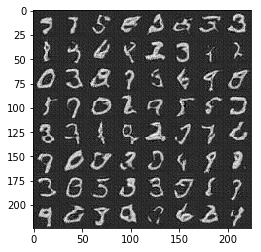

Epoch 2/2... Discriminator Loss: 0.3835... Generator Loss: 1.7268
Epoch 2/2... Discriminator Loss: 0.2698... Generator Loss: 2.1053
Epoch 2/2... Discriminator Loss: 0.1862... Generator Loss: 1.9996
Epoch 2/2... Discriminator Loss: 0.2154... Generator Loss: 2.7045
Epoch 2/2... Discriminator Loss: 0.4889... Generator Loss: 1.7202
Epoch 2/2... Discriminator Loss: 0.0696... Generator Loss: 3.5743
Epoch 2/2... Discriminator Loss: 0.3453... Generator Loss: 1.5345
Epoch 2/2... Discriminator Loss: 0.0592... Generator Loss: 3.6571
Epoch 2/2... Discriminator Loss: 0.3747... Generator Loss: 1.7082
Epoch 2/2... Discriminator Loss: 0.0588... Generator Loss: 3.5698
###out_channel_dim <class 'int'> 1


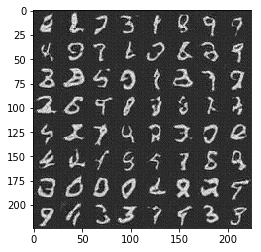

Epoch 2/2... Discriminator Loss: 0.4734... Generator Loss: 1.3523
Epoch 2/2... Discriminator Loss: 0.0382... Generator Loss: 3.7642
Epoch 2/2... Discriminator Loss: 0.1710... Generator Loss: 2.7519
Epoch 2/2... Discriminator Loss: 0.8828... Generator Loss: 0.6827
Epoch 2/2... Discriminator Loss: 0.1716... Generator Loss: 2.6594
Epoch 2/2... Discriminator Loss: 0.5324... Generator Loss: 1.2650
Epoch 2/2... Discriminator Loss: 0.5392... Generator Loss: 1.0386
Epoch 2/2... Discriminator Loss: 2.0688... Generator Loss: 0.2591
Epoch 2/2... Discriminator Loss: 0.1151... Generator Loss: 3.3565
Epoch 2/2... Discriminator Loss: 0.2752... Generator Loss: 2.2527
###out_channel_dim <class 'int'> 1


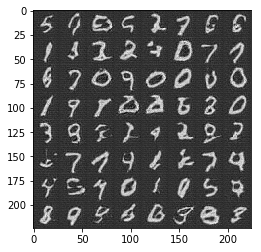

Epoch 2/2... Discriminator Loss: 0.2574... Generator Loss: 2.2448
Epoch 2/2... Discriminator Loss: 0.3416... Generator Loss: 1.9773
Epoch 2/2... Discriminator Loss: 0.1373... Generator Loss: 2.3622
Epoch 2/2... Discriminator Loss: 2.6014... Generator Loss: 0.1655
Epoch 2/2... Discriminator Loss: 0.3306... Generator Loss: 1.9553
Epoch 2/2... Discriminator Loss: 0.1119... Generator Loss: 2.6314
Epoch 2/2... Discriminator Loss: 0.9431... Generator Loss: 5.4422
Epoch 2/2... Discriminator Loss: 1.2391... Generator Loss: 0.3940
Epoch 2/2... Discriminator Loss: 0.3405... Generator Loss: 1.8974
Epoch 2/2... Discriminator Loss: 0.7324... Generator Loss: 0.8156
###out_channel_dim <class 'int'> 1


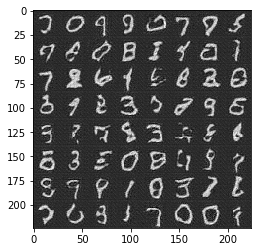

Epoch 2/2... Discriminator Loss: 0.0665... Generator Loss: 3.3764
Epoch 2/2... Discriminator Loss: 0.3700... Generator Loss: 1.6556
Epoch 2/2... Discriminator Loss: 0.2686... Generator Loss: 1.7417
Epoch 2/2... Discriminator Loss: 0.1692... Generator Loss: 2.7826
Epoch 2/2... Discriminator Loss: 0.4287... Generator Loss: 1.7729
Epoch 2/2... Discriminator Loss: 0.4245... Generator Loss: 1.3144
Epoch 2/2... Discriminator Loss: 1.1569... Generator Loss: 5.3746
Epoch 2/2... Discriminator Loss: 0.3985... Generator Loss: 1.5830
Epoch 2/2... Discriminator Loss: 0.3368... Generator Loss: 1.6978
Epoch 2/2... Discriminator Loss: 0.0978... Generator Loss: 2.7307
###out_channel_dim <class 'int'> 1


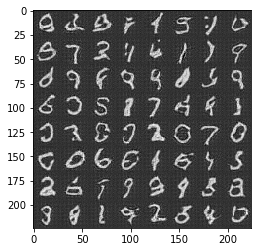

Epoch 2/2... Discriminator Loss: 0.0799... Generator Loss: 3.0540
Epoch 2/2... Discriminator Loss: 0.1226... Generator Loss: 2.6558
Epoch 2/2... Discriminator Loss: 0.8991... Generator Loss: 0.7143
Epoch 2/2... Discriminator Loss: 0.8678... Generator Loss: 3.2306
Epoch 2/2... Discriminator Loss: 0.2758... Generator Loss: 7.0202
Epoch 2/2... Discriminator Loss: 1.6917... Generator Loss: 0.3111
Epoch 2/2... Discriminator Loss: 0.0239... Generator Loss: 4.5543


In [ ]:
batch_size = 10
z_dim = 50
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = None
z_dim = None
learning_rate = None
beta1 = None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.